## Creating the Graphs in Parallelization

Previously in `05_State_Memory.ipynb` we created the reducer for handling the outputs from the parallel graphs similar to these we are going to implement in these.

In [1]:
from langgraph.graph import StateGraph,START,END
from pydantic import BaseModel

Creating the State with `BaseModel` of pydantic, and custom reducer.

In [2]:
import operator
from typing import Annotated


class States(BaseModel):
    queries: Annotated[list[str], operator.add]

Implementing the Nodes.

In [4]:
def node_a(state:States)->States:
    return States(queries=["Im A"])

def node_b(state:States)->States:
    return States(queries=["Im B"])

def node_c(state:States)->States:
    return States(queries=["Im C"])

def node_d(state:States)->States:
    return States(queries=["Im D"])

Implementing the Graph

In [5]:
graph = StateGraph(States)
graph.add_node("a",node_a)
graph.add_node("b",node_b)
graph.add_node("c",node_c)
graph.add_node("d",node_d)

graph.add_edge(START,"a")
graph.add_edge("a","b")
graph.add_edge("a","c")
graph.add_edge("b","d")
graph.add_edge("c",'d')
graph.add_edge("d",END)

compile_graph = graph.compile()

Display the Graph


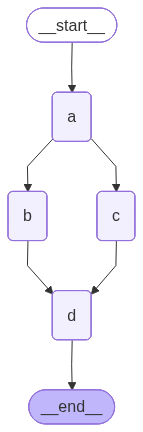

In [6]:
from IPython.display import display,Image

display(Image(compile_graph.get_graph().draw_mermaid_png()))

Invoking the Graph

In [8]:
for chunk in compile_graph.stream(States(queries=[]),stream_mode="values"):
    print(chunk)

{'queries': []}
{'queries': ['Im A']}
{'queries': ['Im A', 'Im B', 'Im C']}
{'queries': ['Im A', 'Im B', 'Im C', 'Im D']}


The Above Graph is called the Parallelization

## Waiting for nodes to finish

In [9]:
def node_b2(states:States)->States:
    return States(queries=["Im B2"])

In [10]:
graph = StateGraph(States)
graph.add_node("a",node_a)
graph.add_node("b",node_b)
graph.add_node("c",node_c)
graph.add_node("d",node_d)
graph.add_node("b2",node_b2)

graph.add_edge(START,"a")
graph.add_edge("a","b")
graph.add_edge("a","c")
graph.add_edge("b","b2")
graph.add_edge(["b2","c"],"d")
graph.add_edge("d",END)

compile_graph = graph.compile()

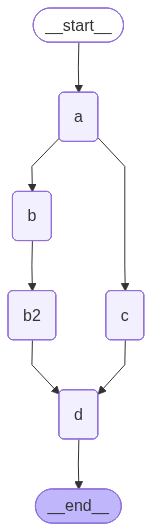

In [11]:
display(Image(compile_graph.get_graph().draw_mermaid_png()))

In [ ]:
for chunk in compile_graph.stream(States(queries=[]),stream_mode="values"):
    print(chunk)

{'queries': []}
{'queries': ['Im A']}
{'queries': ['Im A', 'Im B', 'Im C']}
{'queries': ['Im A', 'Im B', 'Im C', 'Im B2']}
{'queries': ['Im A', 'Im B', 'Im C', 'Im B2', 'Im D']}


### Conditional Edges with Nodes

Alternatively you can also redirect to nodes.

In [17]:
graph = StateGraph(States)
graph.add_node("a",node_a)
graph.add_node("b",node_b)
graph.add_node("c",node_c)
graph.add_node("d",node_d)
graph.add_node("b2",node_b2)

graph.add_edge(START,"a")
graph.add_conditional_edges("a",lambda x: ["b","c"],["b","c"])
graph.add_edge("b","b2")
graph.add_edge(["b2","c"],"d")
graph.add_edge("d",END)

compile_graph = graph.compile()

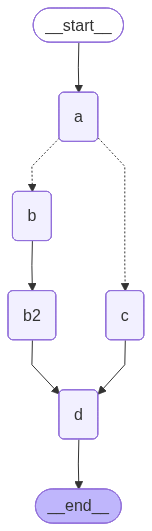

In [18]:
display(Image(compile_graph.get_graph().draw_mermaid_png()))

In [19]:
compile_graph.invoke(States(queries=[]))

{'queries': ['Im A', 'Im B', 'Im C', 'Im B2', 'Im D']}